<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 0ead80a3e6cc12d619b20c09966344a58faf89b6

json      : 2.0.9
numpy     : 1.19.2
matplotlib: 3.3.2
keras     : 2.4.3
watermark : 2.1.0
tensorflow: 2.4.1
pandas    : 1.1.3



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 42s 204ms/step - loss: 0.6725 - accuracy: 0.5505 - val_loss: 0.4181 - val_accuracy: 0.8194
Epoch 2/10
196/196 [==============================] - 41s 212ms/step - loss: 0.3923 - accuracy: 0.8346 - val_loss: 0.4176 - val_accuracy: 0.8196
Epoch 3/10
196/196 [==============================] - 43s 219ms/step - loss: 0.2627 - accuracy: 0.8998 - val_loss: 0.4668 - val_accuracy: 0.7898
Epoch 4/10
196/196 [==============================] - 44s 225ms/step - loss: 0.1598 - accuracy: 0.9446 - val_loss: 0.4004 - val_accuracy: 0.8342
Epoch 5/10
196/196 [==============================] - 39s 199ms/step - loss: 0.0816 - accuracy: 0.9763 - val_loss: 0.4873 - val_accuracy: 0.8297
Epoch 6/10
196/196 [==============================] - 41s 208ms/step - loss: 0.0347 - accuracy: 0.9933 - val_loss: 0.5428 - val_accuracy: 0.8223
Epoch 7/10
196/196 [==============================] - 29s 149ms/step - loss: 0.0233 - accuracy: 0.9949 - val_loss: 0.5953 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

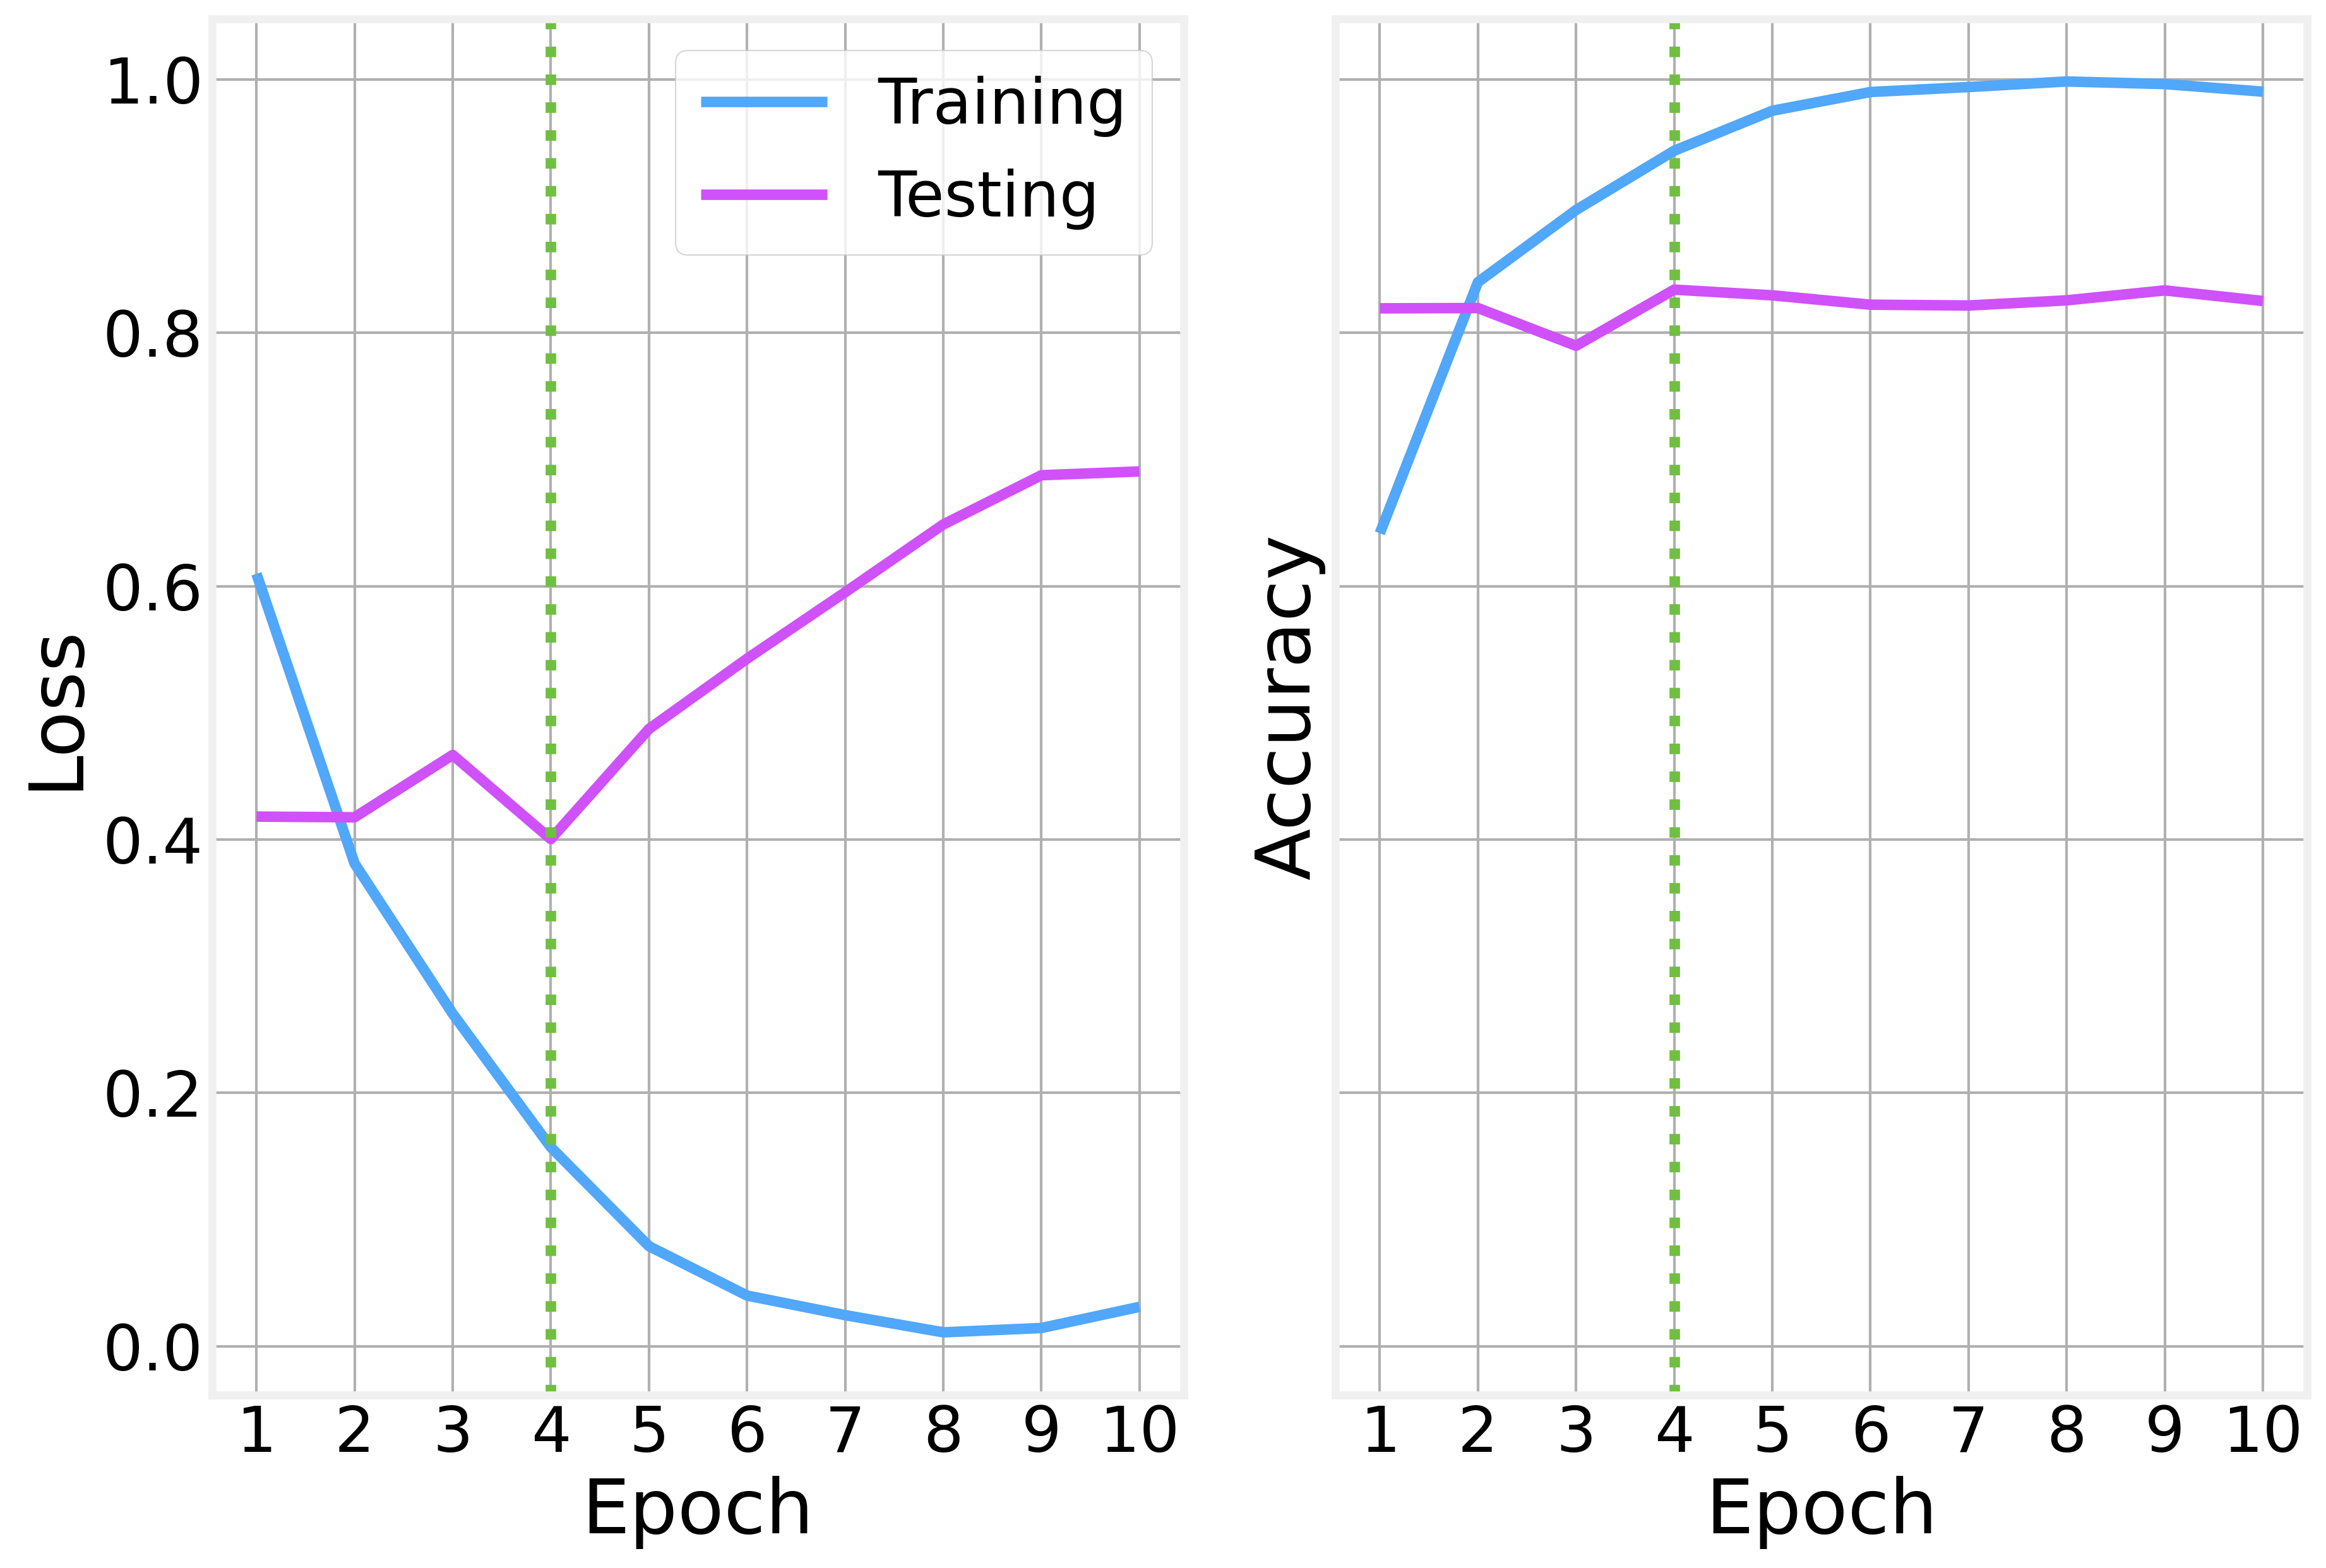

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 42s 206ms/step - loss: 0.6447 - accuracy: 0.6124 - val_loss: 0.3833 - val_accuracy: 0.8324
Epoch 2/10
196/196 [==============================] - 38s 194ms/step - loss: 0.3151 - accuracy: 0.8698 - val_loss: 0.3346 - val_accuracy: 0.8568
Epoch 3/10
196/196 [==============================] - 38s 196ms/step - loss: 0.2080 - accuracy: 0.9228 - val_loss: 0.3345 - val_accuracy: 0.8642
Epoch 4/10
196/196 [==============================] - 38s 194ms/step - loss: 0.1652 - accuracy: 0.9415 - val_loss: 0.3648 - val_accuracy: 0.8649
Epoch 5/10
196/196 [==============================] - 39s 198ms/step - loss: 0.1381 - accuracy: 0.9524 - val_loss: 0.3626 - val_accuracy: 0.8527
Epoch 6/10
196/196 [==============================] - 39s 199ms/step - loss: 0.1204 - accuracy: 0.9617 - val_loss: 0.3974 - val_accuracy: 0.8535
Epoch 7/10
196/196 [==============================] - 39s 201ms/step - loss: 0.1037 - accuracy: 0.9675 - val_loss: 0.4681 - val_ac

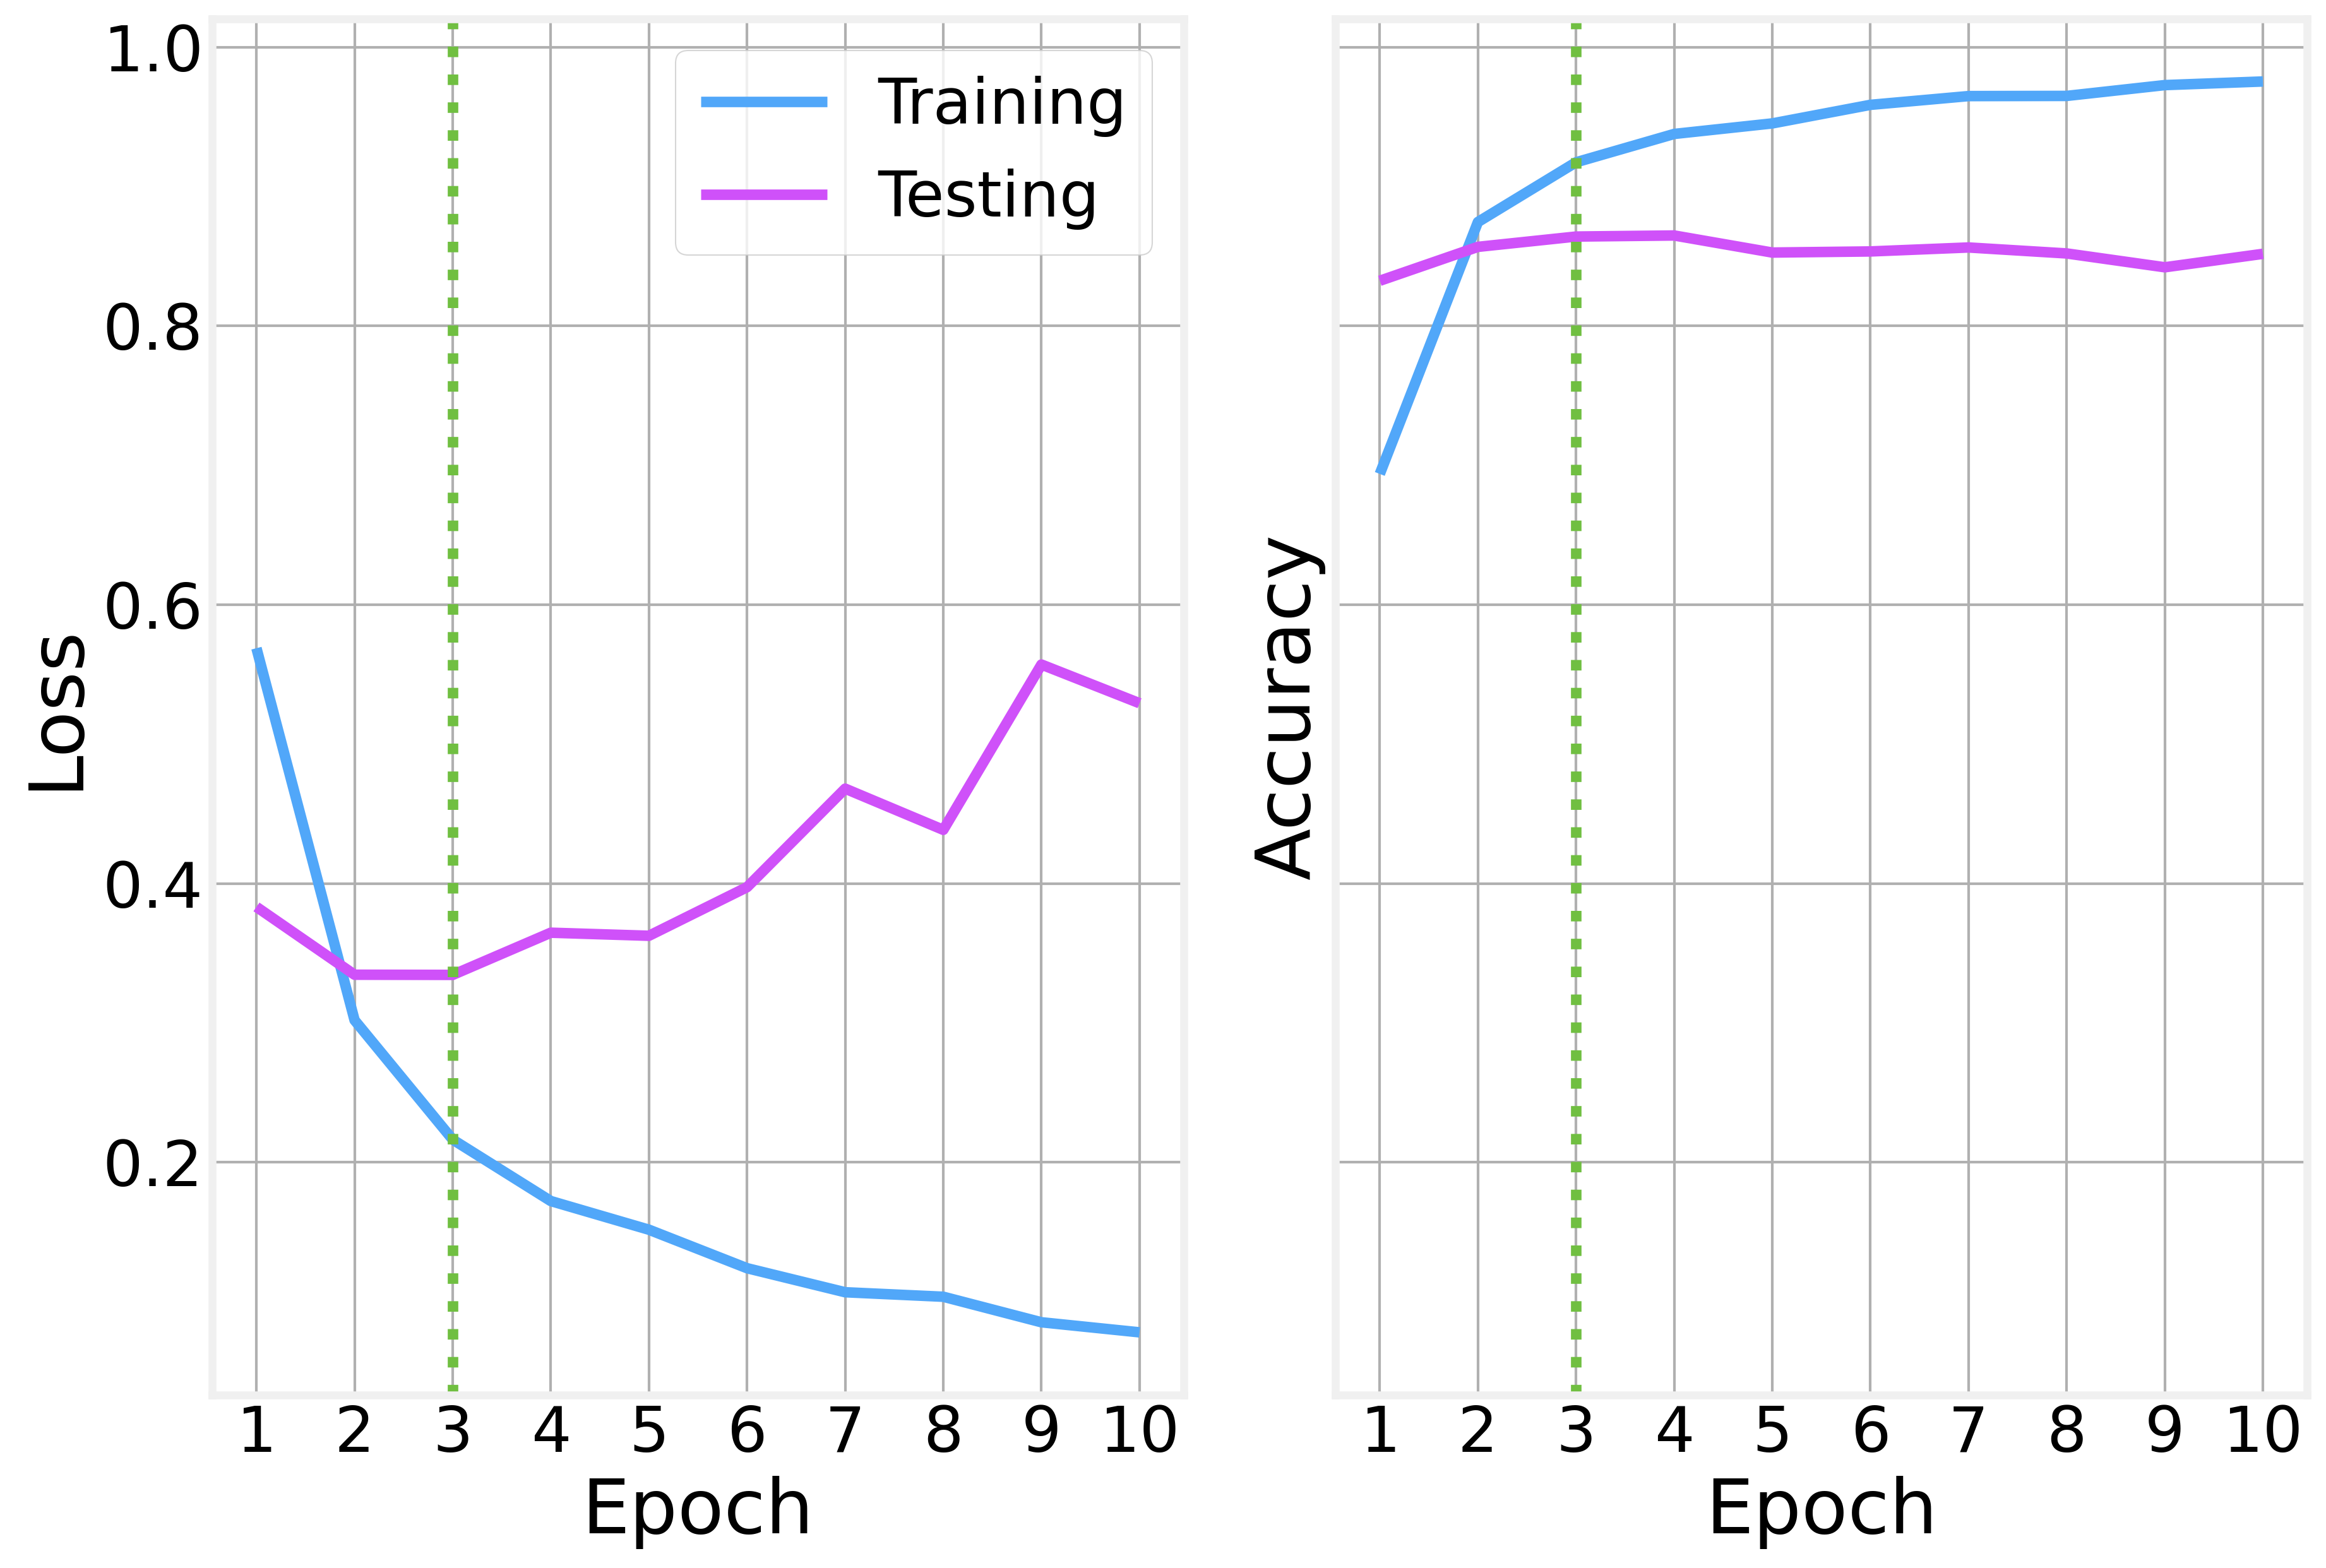

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 45s 224ms/step - loss: 0.5938 - accuracy: 0.6757 - val_loss: 0.2998 - val_accuracy: 0.8723
Epoch 2/10
196/196 [==============================] - 41s 210ms/step - loss: 0.2475 - accuracy: 0.9074 - val_loss: 0.2846 - val_accuracy: 0.8851
Epoch 3/10
196/196 [==============================] - 42s 213ms/step - loss: 0.1668 - accuracy: 0.9416 - val_loss: 0.3429 - val_accuracy: 0.8666
Epoch 4/10
196/196 [==============================] - 54s 278ms/step - loss: 0.1698 - accuracy: 0.9391 - val_loss: 0.3507 - val_accuracy: 0.8669
Epoch 5/10
196/196 [==============================] - 44s 222ms/step - loss: 0.1256 - accuracy: 0.9580 - val_loss: 0.3409 - val_accuracy: 0.8647
Epoch 6/10
196/196 [==============================] - 40s 203ms/step - loss: 0.0922 - accuracy: 0.9708 - val_loss: 0.4013 - val_accuracy: 0.8629
Epoch 7/10
196/196 [==============================] - 39s 199ms/step - loss: 0.0752 - accuracy: 0.9762 - val_loss: 0.4977 - val_ac

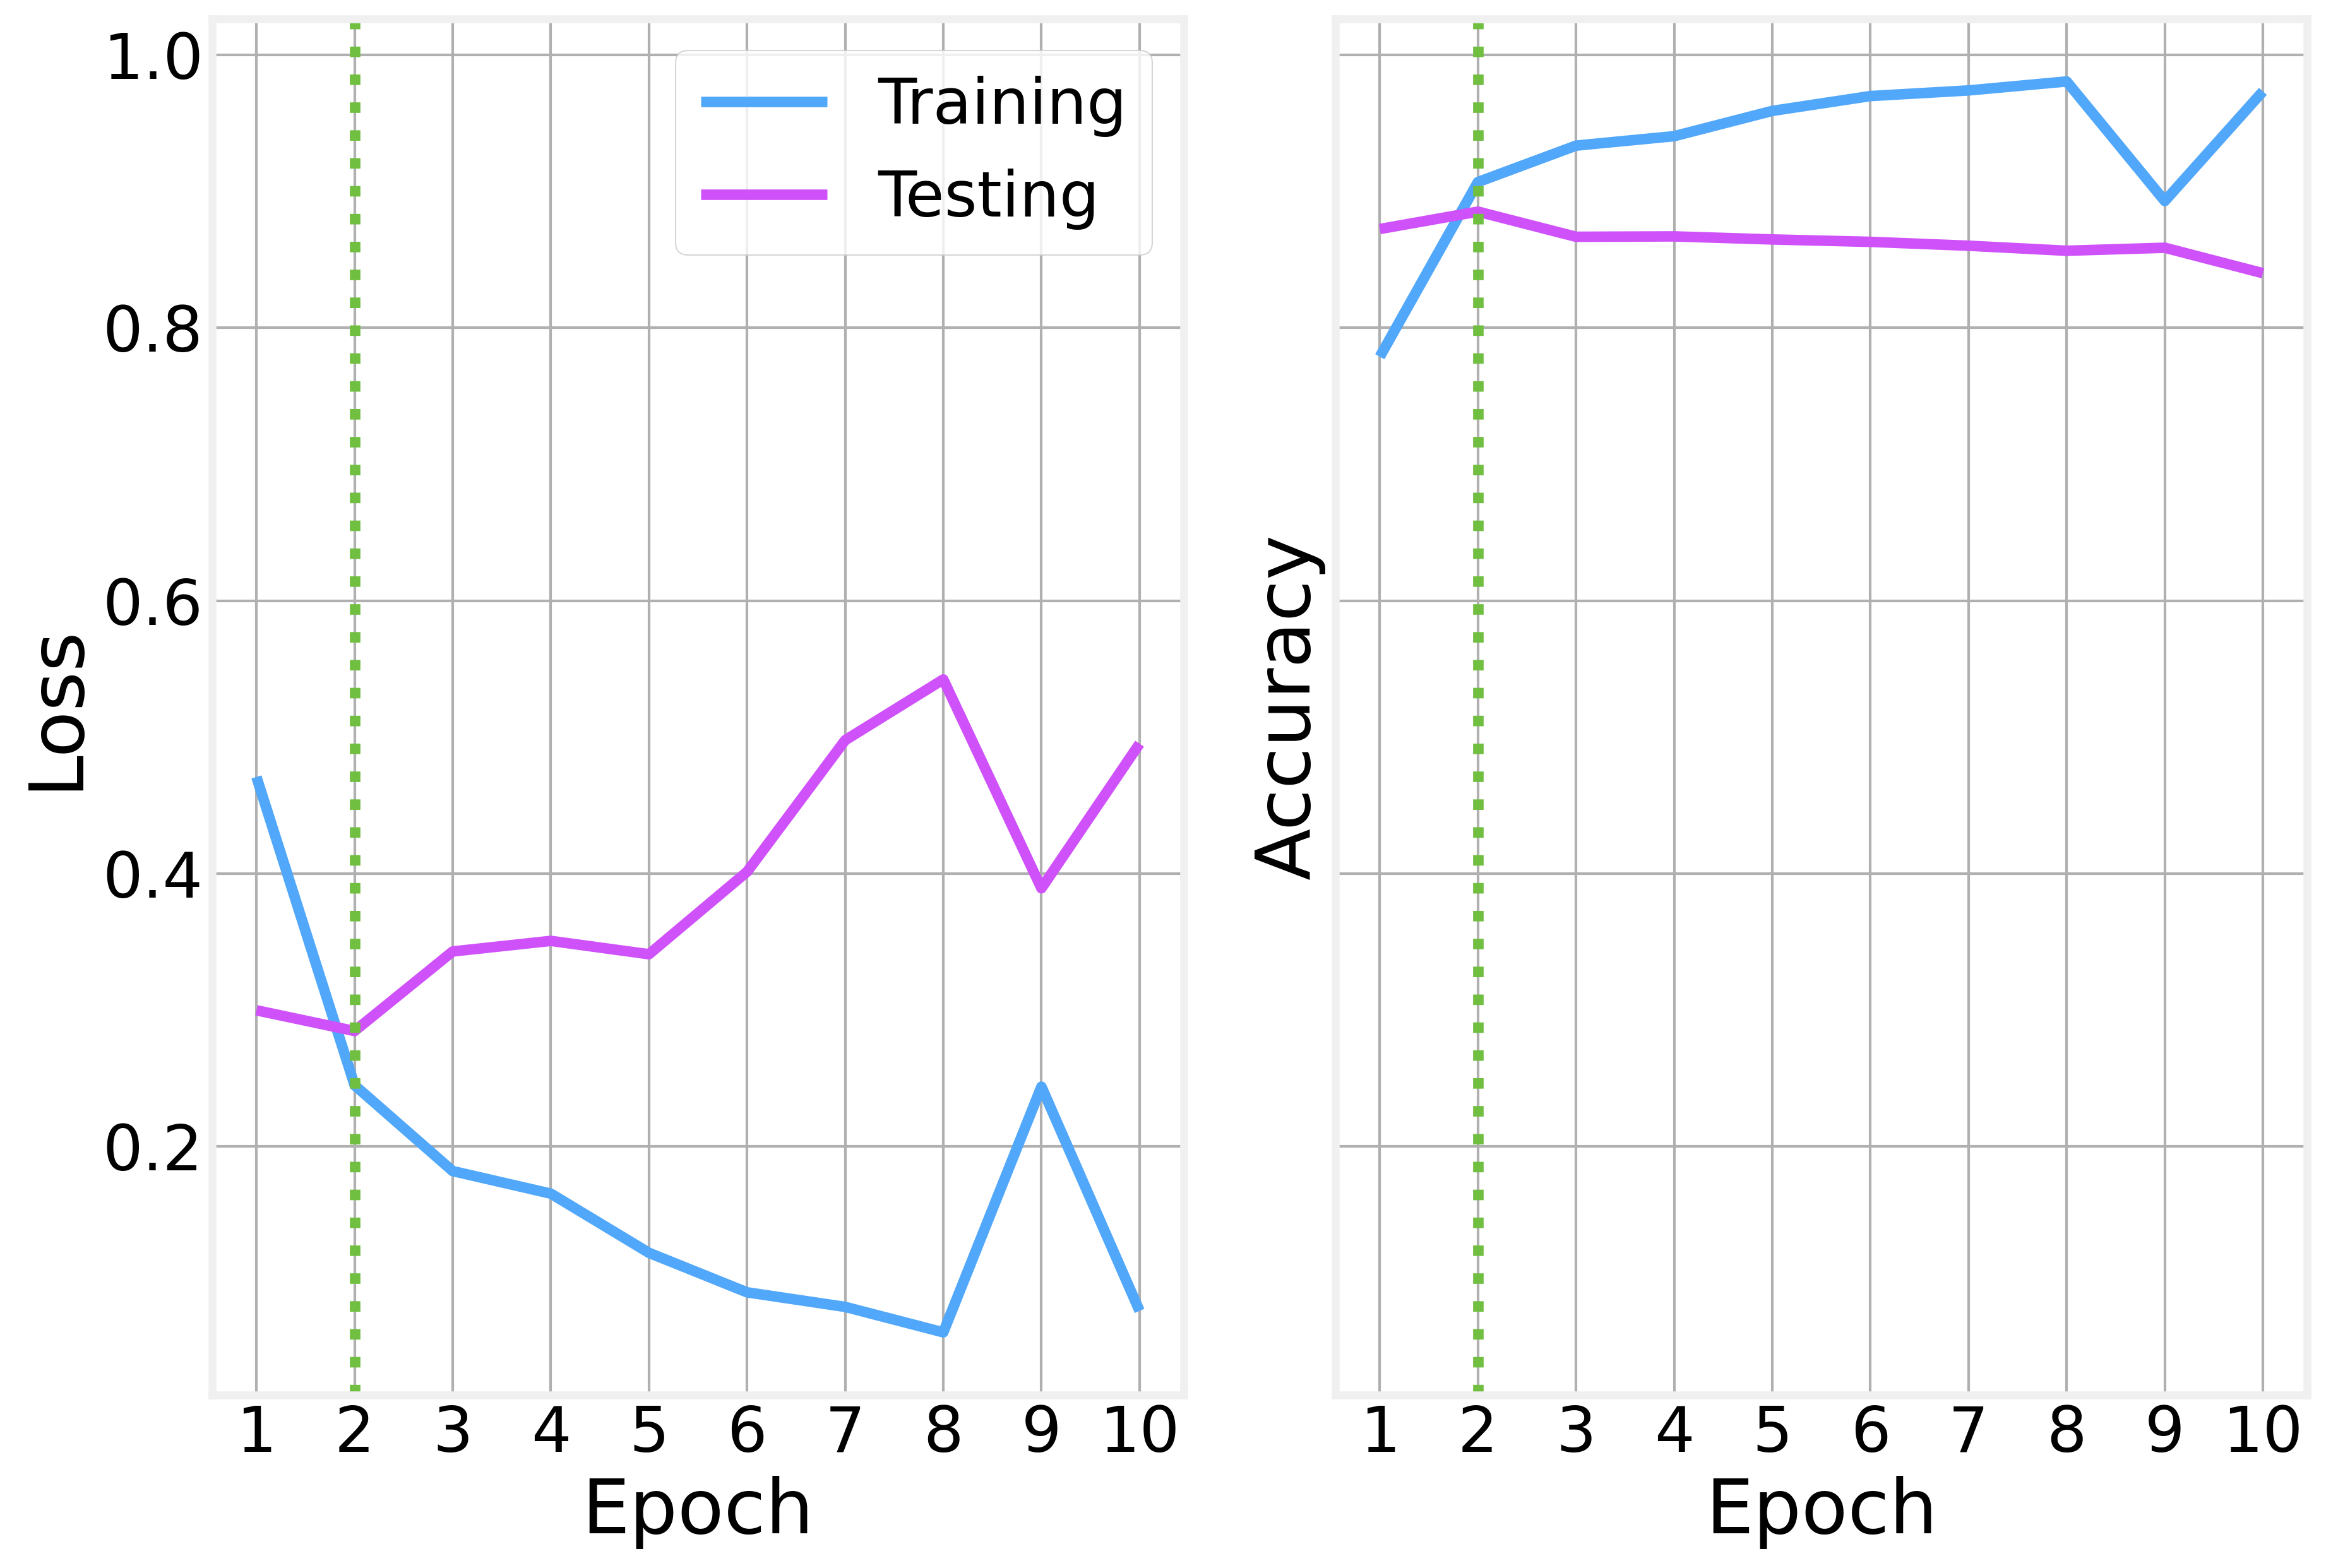

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>